# Import library & Config setting

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import time
import warnings

from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from pandas import plotting
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import  dendrogram, linkage, fcluster

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('default')
warnings.filterwarnings("ignore")

# Load Data

In [3]:
df = pd.read_csv("Mall_Customers.csv")
display(df.head(), df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


None

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# EDA & Pre-processing

In [4]:
df.set_index('CustomerID', inplace = True)

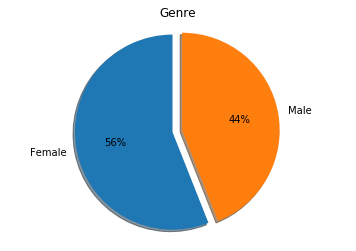

In [5]:
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(df['Genre'].value_counts(),  explode=explode, labels=df['Genre'].value_counts().index.to_list(), autopct='%1.f%%',
        shadow=True, startangle=90, textprops={'color':"black"})
ax1.axis('equal')
plt.title('Genre', color='black')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3E5503B70>,
      dtype=object)

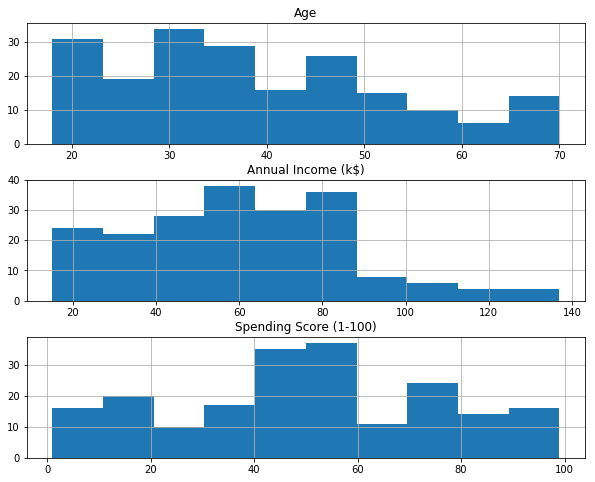

In [6]:
fig, axis = plt.subplots(3,1,figsize=(10, 8))
df.hist(ax=axis)

# Clustering

## Annual income vs Spending score

In [7]:
x = df.iloc[:, [2, 3]].values
print(x.shape)

(200, 2)


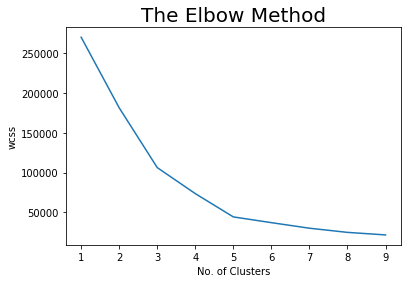

In [8]:
wcss = []
cluster_range = range(1, 10)

for i in cluster_range:
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 33)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(cluster_range, wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

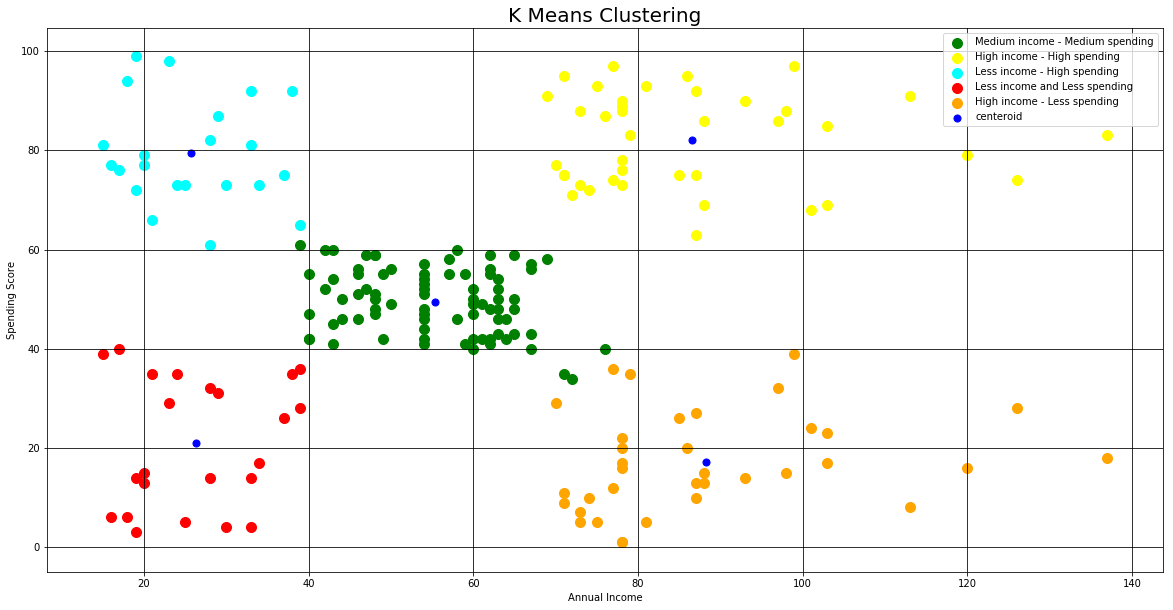

In [9]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 33)
y_means = km.fit_predict(x)

plt.figure(figsize=(20,10))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'green', label =  'Medium income - Medium spending')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label =  'High income - High spending')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label =  'Less income - High spending')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'red', label =  'Less income and Less spending')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label =  'High income - Less spending')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(c='black')
plt.show()

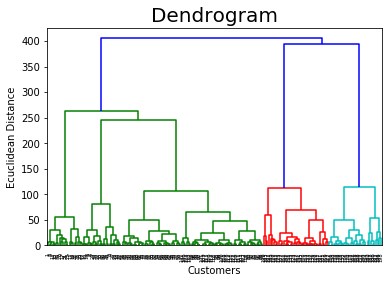

In [10]:
dendrogramx = dendrogram(linkage(x, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

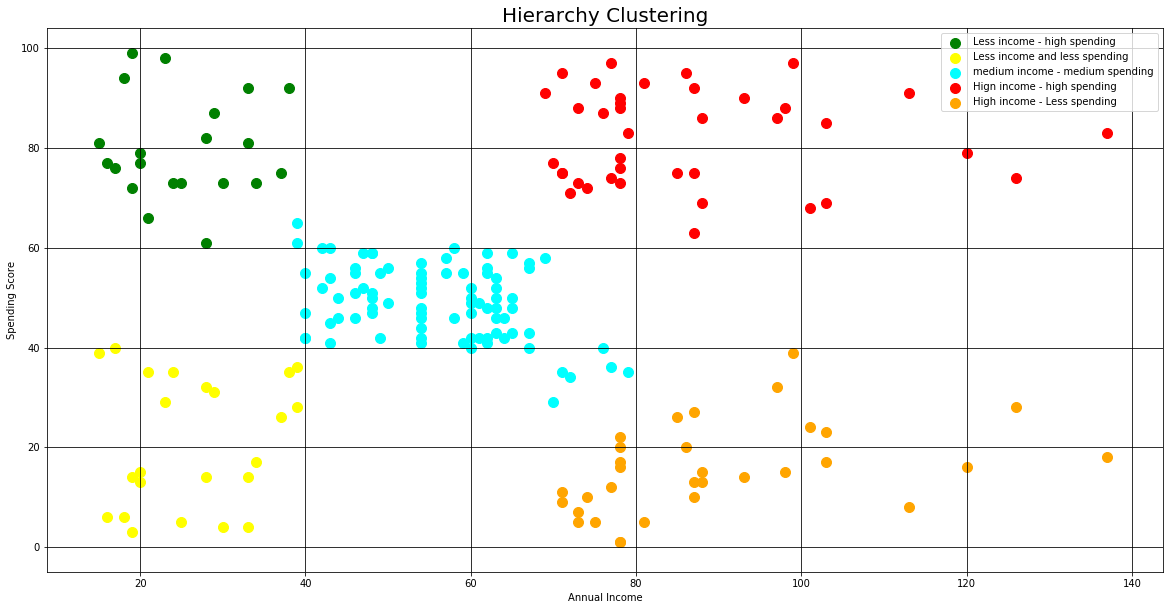

In [11]:
fc = fcluster(linkage(x, method = 'ward'), 5, criterion='maxclust')
plt.figure(figsize=(20,10))

plt.scatter(x[fc == 1, 0], x[fc == 1, 1], s = 100, c = 'green', label =  'Less income - high spending' )
plt.scatter(x[fc == 2, 0], x[fc == 2, 1], s = 100, c = 'yellow', label =  'Less income and less spending' )
plt.scatter(x[fc == 3, 0], x[fc == 3, 1], s = 100, c = 'cyan', label =  'medium income - medium spending' )
plt.scatter(x[fc == 4, 0], x[fc == 4, 1], s = 100, c = 'red', label = 'Hign income - high spending' )
plt.scatter(x[fc == 5, 0], x[fc == 5, 1], s = 100, c = 'orange', label =  'High income - Less spending' )

plt.title('Hierarchy Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(c='black')
plt.show()

### Training time comparison

In [12]:
training_start = time.perf_counter()
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 33)
y_means = km.fit_predict(x)
training_end = time.perf_counter()
print(training_end - training_start)

0.024353


0.1400702


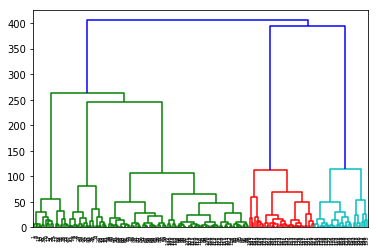

In [13]:
training_start = time.perf_counter()
dendrogramx = dendrogram(linkage(x, method = 'ward'))
training_end = time.perf_counter()
print(training_end - training_start)

## Age vs Spending Score

In [14]:
x = df.iloc[:, [1, 3]].values
x.shape

(200, 2)

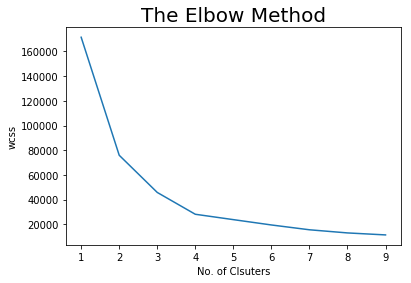

In [15]:
wcss = []

for i in cluster_range:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 33)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


plt.plot(cluster_range, wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clsuters')
plt.ylabel('wcss')
plt.show()

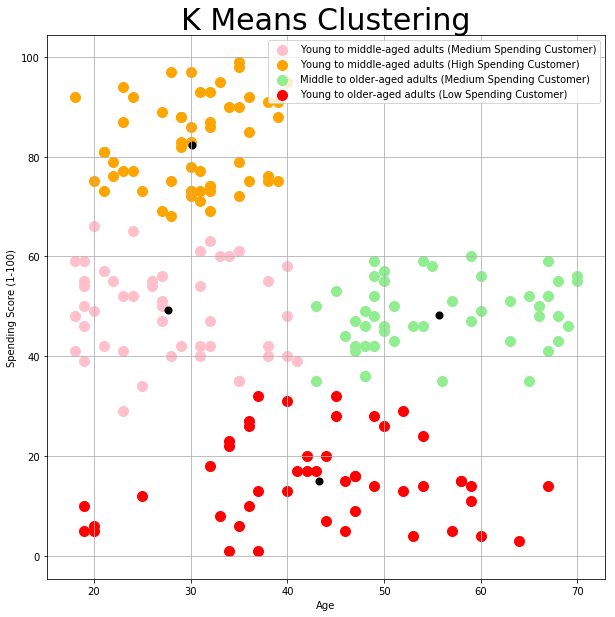

In [16]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 33)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('K Means Clustering', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Young to middle-aged adults (Medium Spending Customer)')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Young to middle-aged adults (High Spending Customer)')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Middle to older-aged adults (Medium Spending Customer)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Young to older-aged adults (Low Spending Customer)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

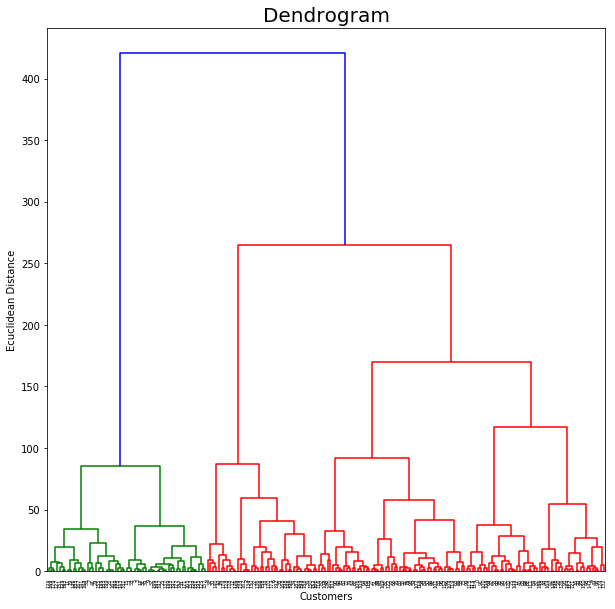

In [17]:
dendrogramx = dendrogram(linkage(x, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

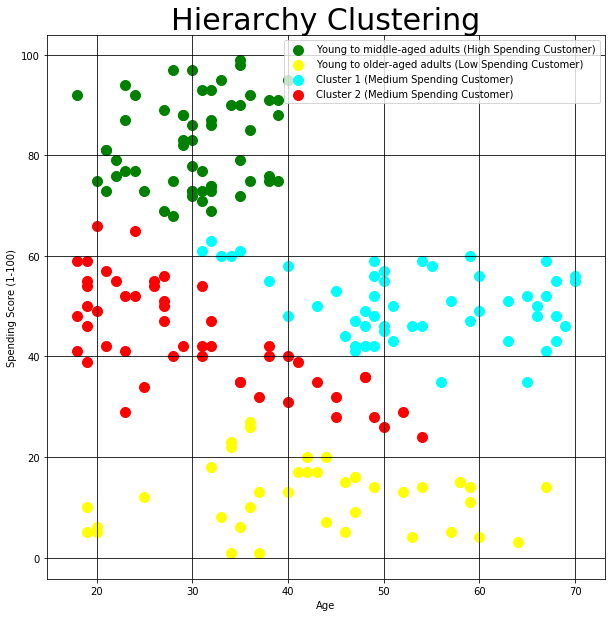

In [18]:
fc = fcluster(linkage(x, method = 'ward'), 4, criterion='maxclust')

plt.scatter(x[fc == 1, 0], x[fc == 1, 1], s = 100, c = 'green', label = 'Young to middle-aged adults (High Spending Customer)')
plt.scatter(x[fc == 2, 0], x[fc == 2, 1], s = 100, c = 'yellow', label = 'Young to older-aged adults (Low Spending Customer)')
plt.scatter(x[fc == 3, 0], x[fc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 1 (Medium Spending Customer)')
plt.scatter(x[fc == 4, 0], x[fc == 4, 1], s = 100, c = 'red', label = 'Cluster 2 (Medium Spending Customer)')

plt.title('Hierarchy Clustering', fontsize = 30)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(c='black')
plt.show()

## Annual Income vs Spending Score vs Age

In [19]:
x = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_clusters = km.fit_predict(x)
labels = km.labels_
centroids = km.cluster_centers_

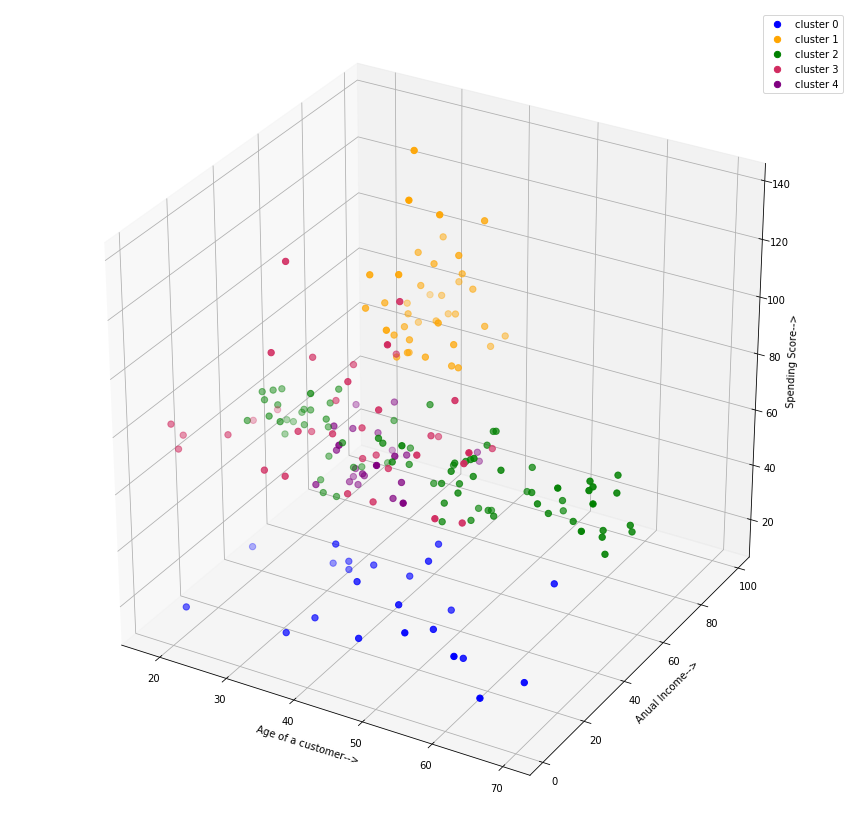

In [20]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()

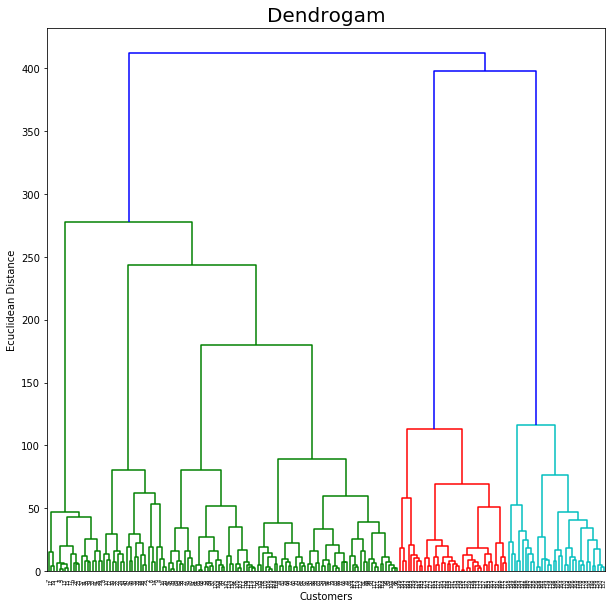

In [21]:
dendrogramx = dendrogram(linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

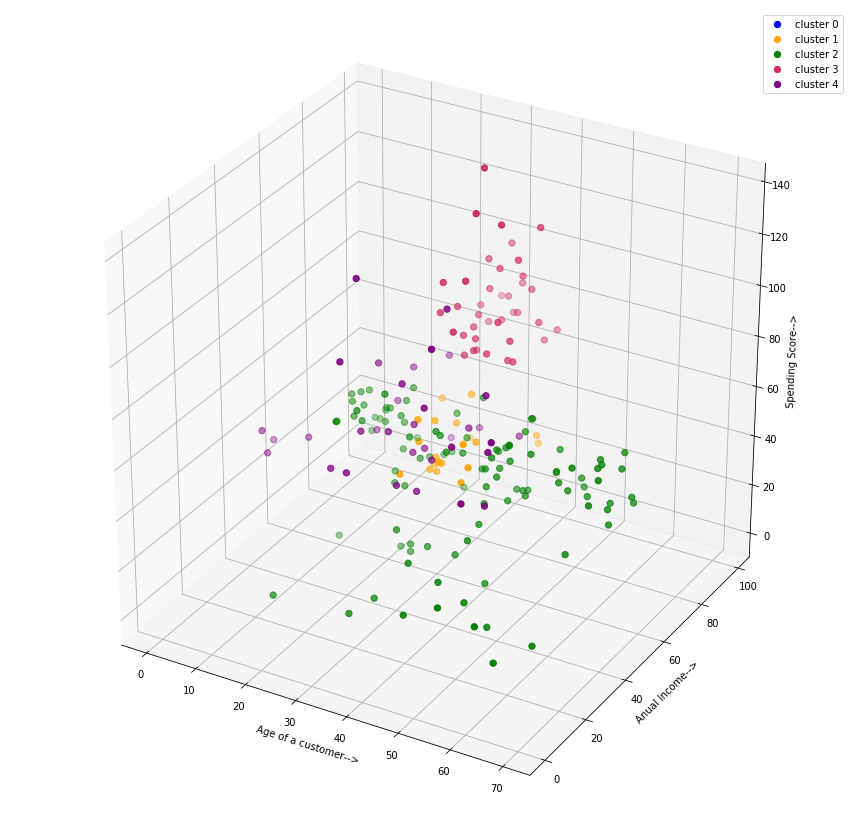

In [22]:
fc = fcluster(linkage(x, method = 'ward'), 4, criterion='maxclust')
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[fc == 0,0],x[fc == 0,1],x[fc == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[fc == 1,0],x[fc == 1,1],x[fc == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[fc == 2,0],x[fc == 2,1],x[fc == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[fc == 3,0],x[fc == 3,1],x[fc == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[fc == 4,0],x[fc == 4,1],x[fc == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()